In [1]:
%display latex
from ulbc import *
from flowstar import *
from ulbc.bondcalculus import *

In [2]:
R.<x1,x2,x3,x4,x5,x6,x7,x8,x9> = RIF[]

In [3]:
y = vector([
    10*x3 - RIF('0.1')*x1*x6,
    100*x4 - x1*x2,
    RIF('0.1')*x1*x6 - 50*x3,
    x2*x6 - 100*x4,
    5*x3 + RIF('0.5')*x1 - 10*x5,
    50*x5 + 50*x3 + 100*x4 - x6*(RIF('0.1')*x1 + x2 + 2*x8 + 1),
    50*x4 + RIF('0.01')*x2 - RIF('0.5')*x7,
    RIF('0.5')*x7 - 2*x6*x8 + x9 - RIF('0.2')*x8,
    2*x6*x8 - x9,
])

In [4]:
y

(-0.10000000000000000?*x1*x6 + 10*x3, -x1*x2 + 100*x4, 0.10000000000000000?*x1*x6 - 50*x3, x2*x6 - 100*x4, 0.50000000000000000?*x1 + 5*x3 - 10*x5, -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6, 0.01000000000000000?*x2 + 50*x4 - 0.50000000000000000?*x7, -2*x6*x8 + 0.50000000000000000?*x7 - 0.2000000000000000?*x8 + x9, 2*x6*x8 - x9)

In [5]:
table([[yi] for yi in y])

""
""
""
""
""
""
""
""
""


In [6]:
y0 = [
    RIF('[0.98, 1.02]'),
    RIF('[1.28, 1.32]'),
    RIF('[0.08, 0.12]'),
    RIF('[0.08, 0.12]'),
    RIF('[0.08, 0.12]'),
    RIF('[1.28, 1.32]'),
    RIF('[2.48, 2.52]'),
    RIF('[0.58, 0.62]'),
    RIF('[1.28, 1.32]'),
]

In [7]:
table([y0i.endpoints() for y0i in y0])

,
,
,
,
,
,
,
,
,


In [8]:
R

Multivariate Polynomial Ring in x1, x2, x3, x4, x5, x6, x7, x8, x9 over Real Interval Field with 53 bits of precision

In [9]:
sys = System(R, R.gens(), y0, y); sys

System(R, (x1, x2, x3, x4, x5, x6, x7, x8, x9), [[0.97999999999999998 .. 1.0200000000000001], [1.2799999999999998 .. 1.3200000000000001], [0.079999999999999987 .. 0.12000000000000001], [0.079999999999999987 .. 0.12000000000000001], [0.079999999999999987 .. 0.12000000000000001], [0.27999999999999997 .. 0.32000000000000001], [2.4799999999999999 .. 2.5200000000000001], [0.57999999999999996 .. 0.62000000000000011], [1.2799999999999998 .. 1.3200000000000001]], (-0.10000000000000000?*x1*x6 + 10*x3, -x1*x2 + 100*x4, 0.10000000000000000?*x1*x6 - 50*x3, x2*x6 - 100*x4, 0.50000000000000000?*x1 + 5*x3 - 10*x5, -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6, 0.01000000000000000?*x2 + 50*x4 - 0.50000000000000000?*x7, -2*x6*x8 + 0.50000000000000000?*x7 - 0.2000000000000000?*x8 + x9, 2*x6*x8 - x9), varmap=bidict({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'x5': x5, 'x6': x6, 'x7': x7, 'x8': x8, 'x9': x9}))

In [10]:
RReal = RR['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']

In [11]:
RReal(sys.y[2])

0.100000000000000*x1*x6 - 50.0000000000000*x3

In [12]:
sys_real = System(
    RReal,
    RReal.gens(),
    [y0i.center() for y0i in sys.y0],
    [RReal(yi) for yi in sys.y],
)
sys_real

System(R, (x1, x2, x3, x4, x5, x6, x7, x8, x9), [1, [1.2999999999999998 .. 1.2999999999999999], [0.10000000000000000 .. 0.10000000000000001], [0.10000000000000000 .. 0.10000000000000001], [0.10000000000000000 .. 0.10000000000000001], [0.29999999999999998 .. 0.29999999999999999], [2.5000000000000000 .. 2.5000000000000000], [0.60000000000000008 .. 0.60000000000000009], [1.2999999999999998 .. 1.2999999999999999]], (-0.100000000000000*x1*x6 + 10.0000000000000*x3, -x1*x2 + 100.000000000000*x4, 0.100000000000000*x1*x6 - 50.0000000000000*x3, x2*x6 - 100.000000000000*x4, 0.500000000000000*x1 + 5.00000000000000*x3 - 10.0000000000000*x5, -0.100000000000000*x1*x6 - x2*x6 - 2.00000000000000*x6*x8 + 50.0000000000000*x3 + 100.000000000000*x4 + 50.0000000000000*x5 - x6, 0.0100000000000000*x2 + 50.0000000000000*x4 - 0.500000000000000*x7, -2.00000000000000*x6*x8 + 0.500000000000000*x7 - 0.200000000000000*x8 + x9, 2.00000000000000*x6*x8 - x9), varmap=bidict({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'x5': x5, 'x6': x6, 'x7': x7, 'x8': x8, 'x9': x9}))

In [13]:
y0_real = [y0i.center() for y0i in sys.y0]
table([[y0i] for y0i in y0_real])

""
""
""
""
""
""
""
""
""


In [14]:
timepoints = srange(0,10,0.1)

In [15]:
sln = desolve_odeint(sys_real.y, y0_real, timepoints, list(sys_real.x))

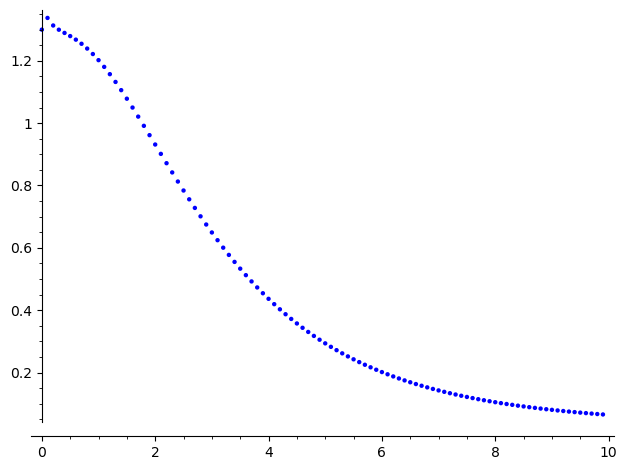

In [16]:
points(zip(timepoints, [yi[1] for yi in sln]))

In [17]:
from scipy.integrate import solve_ivp
from ulbc.matricies import vec_to_numpy, mat_to_numpy, convert_vec, sympy_gens

In [18]:
f = vec_to_numpy(RReal, sys_real.y)
jac = mat_to_numpy(RReal, sage.jacobian(sys_real.y, sys_real.x))

In [19]:
sln = solve_ivp(f,
                (0, 10),
                y0_real,
                method='LSODA',
                jac=jac,
                vectorized=True,
                dense_output=True)

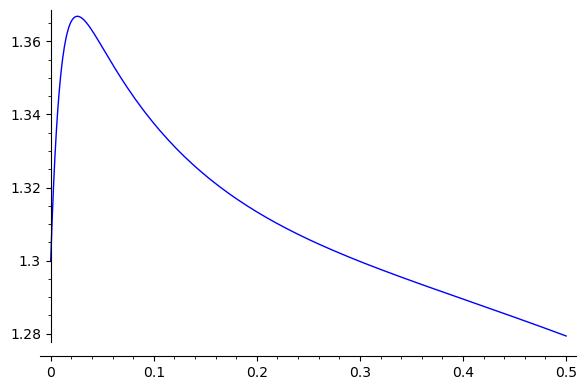

In [20]:
plot(lambda t: sln.sol(t)[1], (0, 0.5))

In [21]:
import time
t0 = time.time()
r = sys.reach(
    3, order=4, step=0.003,
    precondition=1,
    estimation=1e-1,
    max_remainder_queue=200,
    integration_method=IntegrationMethod.ONLY_PICARD_SYMB,
    cutoff_threshold=1e-6)
t1 = time.time()
print(f"Reachability done in {t1 - t0}")

calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.27999999999999997 .. 0.32000000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.27999999999999997..0.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Reachability done in 70.92629384994507


In [22]:
r.num_flowpipes

1000

var_id_x = 2
var_id_y = 4


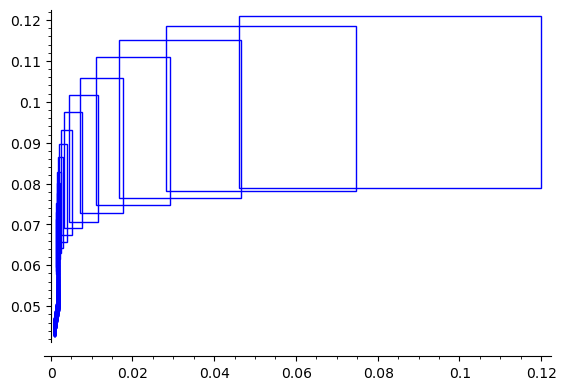

In [23]:
r.sage_interval_plot('x3', 'x5', 0.01)

var_id_x = 3
var_id_y = 5


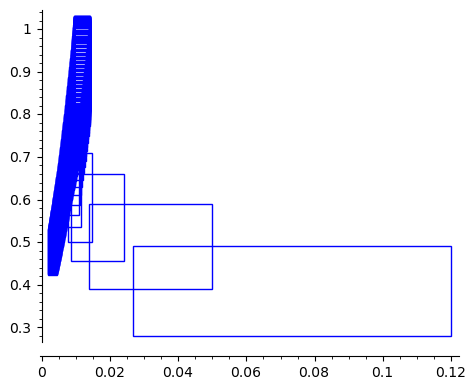

In [24]:
out = r.sage_interval_plot('x4', 'x6', 0.01)
out.set_aspect_ratio(1/8)
out

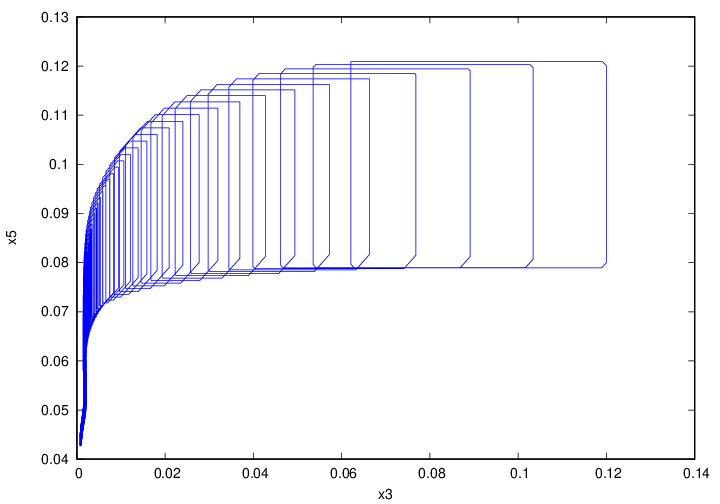

In [25]:
r.wplot('x3', 'x5')

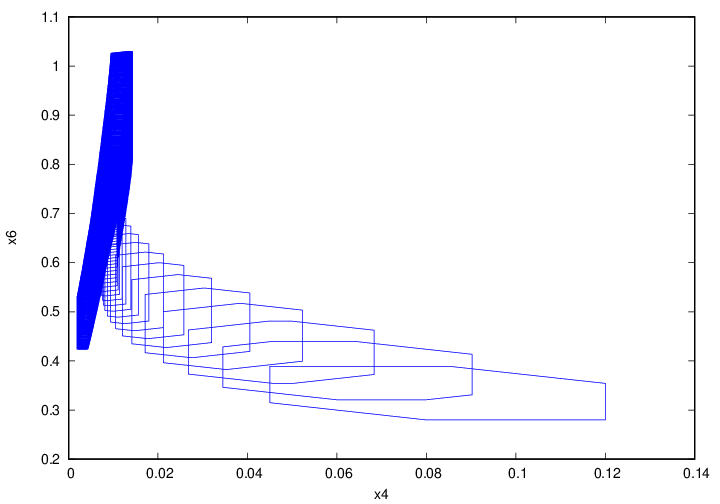

In [26]:
r.wplot('x4', 'x6')

In [27]:
fl = lambda t: r(RIF(t))[5].lower()
fu = lambda t: r(RIF(t))[5].upper()

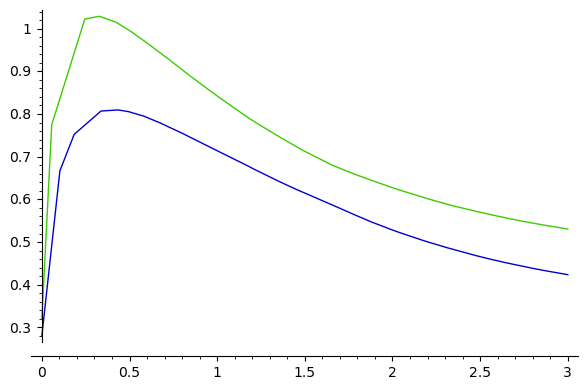

In [28]:
plot((fl, fu), (0, 3), plot_points=30, adaptive_recursion=0)

In [29]:
sig = Atomic(var("x6") < 0.8).signal(r, tentative_unpreconditioning=True, symbolic_composition=True)
sig

PolyObserver(-x6 + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x55a2e65bc9c0>, 0.10000000000000000?*x1*x6 + x2*x6 + 2*x6*x8 - 50*x3 - 100*x4 - 50*x5 + x6 symbolic_composition=True, tentative_unpreconditioning=True, mask=None)
symbolic_composition=True, tentative_unpreconditioning=True
roots(space_domain=None, epsilon=1e-05, verbosity=0)
roots = [[0.064533377983715375 .. 0.28200000000000026], [0.59023251365807150 .. 1.1041382995739917]]
domain = [0.0000000000000000 .. 2.9990000000000002]
roots = [[0.064533377983715375 .. 0.28200000000000026], 
 [0.59023251365807150 .. 1.1041382995739917]]
seg_domain = [0.0000000000000000 .. 2.9990000000000002]
roots = [[0.064533377983715375 .. 0.28200000000000026], 
 [0.59023251365807150 .. 1.1041382995739917]]


Signal([0.0000000000000000 .. 2.9990000000000002], [([0.0000000000000000 .. 0.064533377983715376], True), ([0.28200000000000025 .. 0.59023251365807151], False), ([1.1041382995739916 .. 2.9990000000000002], True)], mask=None)

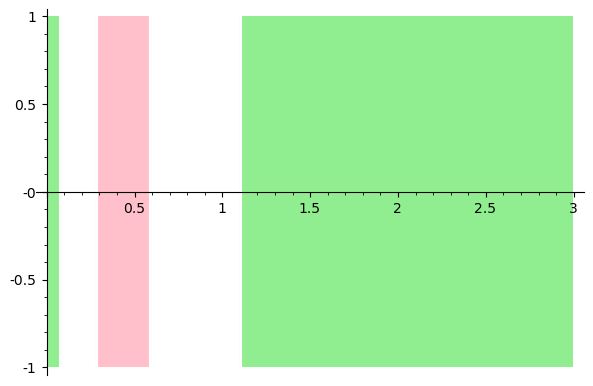

In [30]:
sig.plot()

In [32]:
import time
t0 = time.time()
r = sys.reach(
    7, order=4, step=0.003,
    precondition=1,
    estimation=1e-1,
    max_remainder_queue=200,
    integration_method=IntegrationMethod.ONLY_PICARD_SYMB,
    cutoff_threshold=1e-6)
t1 = time.time()
print(f"Reachability done in {t1 - t0}")

calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.27999999999999997 .. 0.32000000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.27999999999999997..0.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Reachability done in 164.64310479164124


In [33]:
r.res

2

In [34]:
r.num_flowpipes

2334

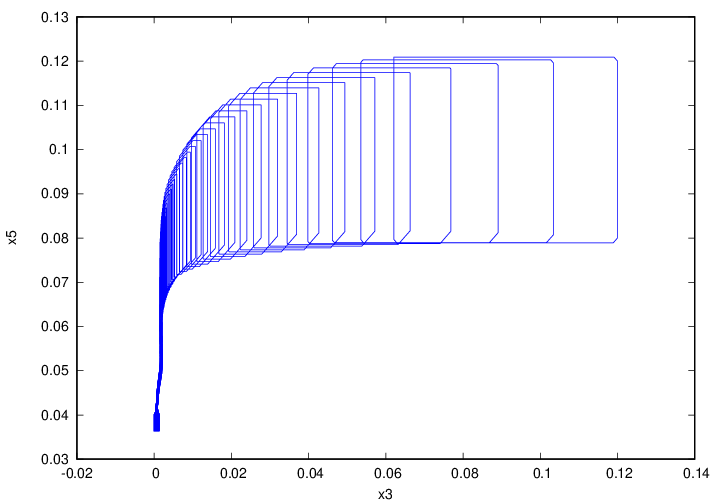

In [35]:
r.wplot('x3', 'x5')

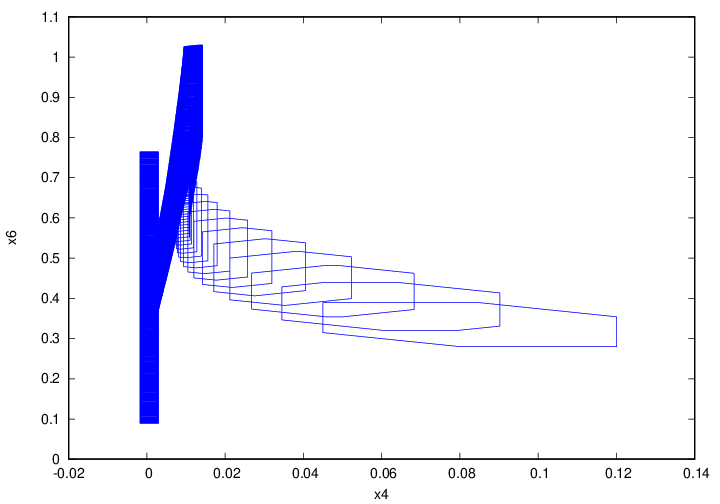

In [36]:
r.wplot('x4', 'x6')

In [37]:
table([r(RIF(t, t+0.1))[5].endpoints() for t in srange(0, 2, 0.1)])

,
,
,
,
,
,
,
,
,
,
,


In [38]:
fl = lambda t: r(RIF(t))[5].lower()
fu = lambda t: r(RIF(t))[5].upper()

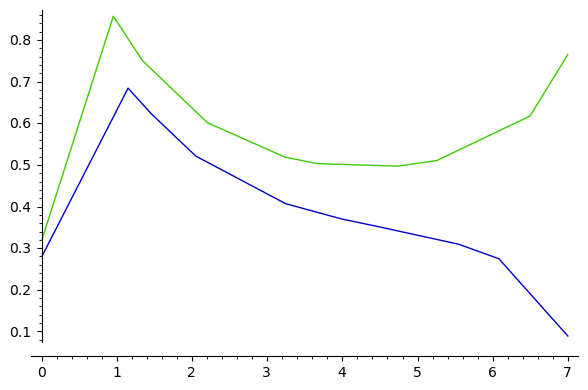

In [39]:
plot((fl, fu), (0, 7), plot_points=10, adaptive_recursion=0)

In [40]:
sig = Atomic(var("x4") > RIF('0.005')).signal(r)

PolyObserver(x4 - 0.005000000000000000?, <flowstar.reachability.Reach object at 0x55a2e79164c0>, x2*x6 - 100*x4 symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
symbolic_composition=False, tentative_unpreconditioning=True
roots(space_domain=None, epsilon=1e-05, verbosity=0)
roots = [[1.5986448542980644 .. 1.5990000000000236], [1.6005062861846504 .. 2.6790000000000647]]
domain = [0.0000000000000000 .. 6.9989999999999997]
roots = [[1.5986448542980644 .. 1.5990000000000236], 
 [1.6005062861846504 .. 2.6790000000000647]]
seg_domain = [0.0000000000000000 .. 6.9989999999999997]
roots = [[1.5986448542980644 .. 1.5990000000000236], 
 [1.6005062861846504 .. 2.6790000000000647]]


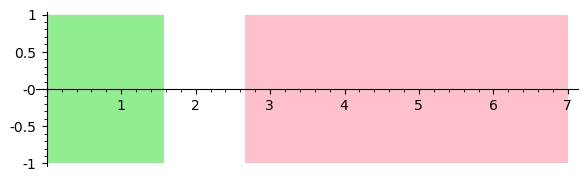

In [41]:
sig.plot()

In [42]:
sig = F(RIF(0, 3), Atomic(var("x6") < RIF('0.8')) & Atomic(var("x4") > RIF('0.005'))).signal(r)

PolyObserver(-x6 + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x55a2e79164c0>, 0.10000000000000000?*x1*x6 + x2*x6 + 2*x6*x8 - 50*x3 - 100*x4 - 50*x5 + x6 symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
symbolic_composition=False, tentative_unpreconditioning=True
roots(space_domain=None, epsilon=1e-05, verbosity=0)
roots = [[0.063868721192113467 .. 0.29700000000000027], [0.54242360744031825 .. 1.1460000000000064]]
domain = [0.0000000000000000 .. 6.9989999999999997]
roots = [[0.063868721192113467 .. 0.29700000000000027], 
 [0.54242360744031825 .. 1.1460000000000064]]
seg_domain = [0.0000000000000000 .. 6.9989999999999997]
roots = [[0.063868721192113467 .. 0.29700000000000027], 
 [0.54242360744031825 .. 1.1460000000000064]]
PolyObserver(x4 - 0.005000000000000000?, <flowstar.reachability.Reach object at 0x55a2e79164c0>, x2*x6 - 100*x4 symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
symbolic_composition=False, tentative_unpr

In [43]:
sig(0)

True

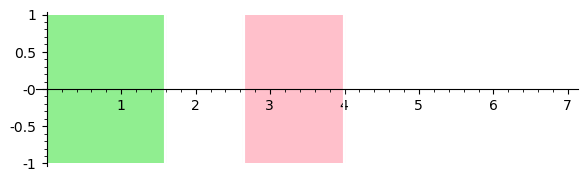

In [44]:
sig.plot()

In [45]:
def test_monitoring(prop, duration, **kwargs):
    t0 = time.time()
    sig = prop.signal_for_system(sys,
    duration,
    order=4, step=0.003,
    precondition=1,
    estimation=1e-1,
    max_remainder_queue=200,
    integration_method=IntegrationMethod.ONLY_PICARD_SYMB,
    cutoff_threshold=1e-6,
    **kwargs)
    t1 = time.time()
    print(f"Run done in {t1 - t0} sec\noptions: {repr(kwargs)}")
    return t1 - t0, sig

Precomposed systems in 1.0728836059570312e-05 sec
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.27999999999999997 .. 0.32000000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.27999999999999997..0.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Computed 2334 flowpipes in 172.80826926231384 sec
PolyObserver(-x8 + 0.800000000000

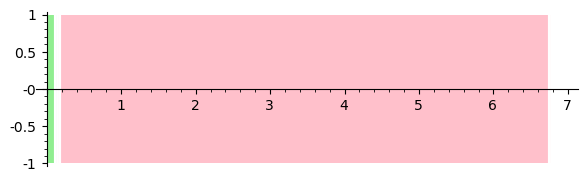

In [46]:
test_monitoring(Atomic(var("x8") <= 0.8), 7)[1].plot()

Precomposed systems in 1.0728836059570312e-05 sec
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.27999999999999997 .. 0.32000000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.27999999999999997..0.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Computed 2334 flowpipes in 172.53769397735596 sec
PolyObserver(-x8 + 0.800000000000

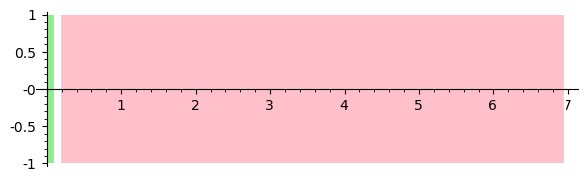

In [47]:
test_monitoring(Atomic(var("x8") <= 0.8), 7, symbolic_composition=True)[1].plot()

Precomposed systems in 8.58306884765625e-06 sec
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.27999999999999997 .. 0.32000000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.27999999999999997..0.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Computed 2334 flowpipes in 152.9717242717743 sec
PolyObserver(-x8 + 0.800000000000000

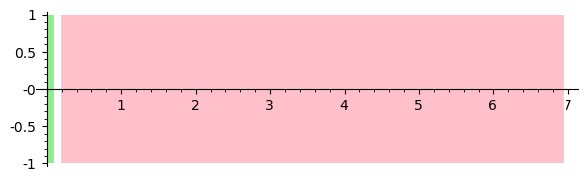

In [48]:
test_monitoring(Atomic(var("x8") <= 0.8), 7, symbolic_composition=True, masks=True)[1].plot()

Precomposed systems in 5.4836273193359375e-06 sec
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.27999999999999997 .. 0.32000000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.27999999999999997..0.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Computed 2334 flowpipes in 186.87824082374573 sec
PolyObserver(-x8 + 0.800000000000

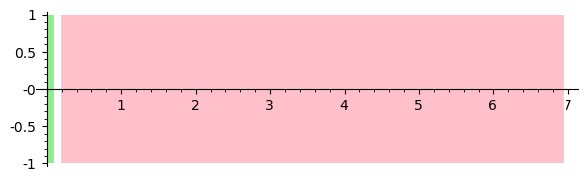

In [49]:
test_monitoring(Atomic(var("x8") <= 0.8), 7, symbolic_composition=True, masks=True, tentative_unpreconditioning=False)[1].plot()

Precomposed systems in 5.9604644775390625e-06 sec
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.27999999999999997 .. 0.32000000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.27999999999999997..0.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Computed 2334 flowpipes in 159.11929845809937 sec
PolyObserver(-x8 + 0.800000000000

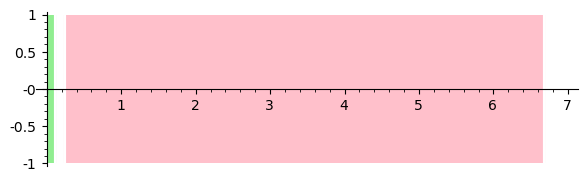

In [50]:
test_monitoring(Atomic(var("x8") <= 0.8), 7, global_root_detection=True)[1].plot()

In [51]:
prop = F(RIF(2.5, 3), Atomic(var("x6") < RIF('0.8')) & Atomic(var("x4") > RIF('0.005')))
prop

F([2.5000000000000000 .. 3.0000000000000000], And([Atomic(x6 < 0.8000000000000000?), Atomic(x4 > 0.005000000000000000?)]))

Precomposed systems in 0.00013303756713867188 sec
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.27999999999999997 .. 0.32000000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.27999999999999997..0.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Computed 2334 flowpipes in 156.7720148563385 sec
PolyObserver(-x6 + 0.8000000000000

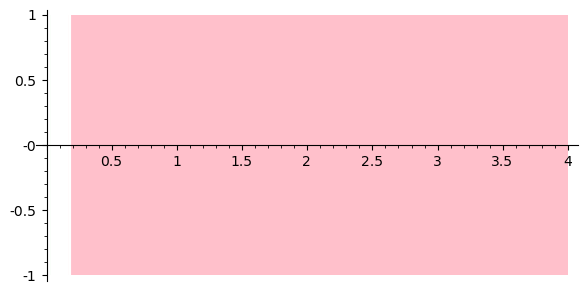

In [52]:
test_monitoring(prop, 4)[1].plot()

Precomposed systems in 7.152557373046875e-05 sec
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.27999999999999997 .. 0.32000000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.27999999999999997..0.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Computed 2334 flowpipes in 165.1061019897461 sec
PolyObserver(-x6 + 0.80000000000000

/usr/lib64/python3.7/site-packages/sage/plot/contour_plot.py:205: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths, linestyles=linestyles)


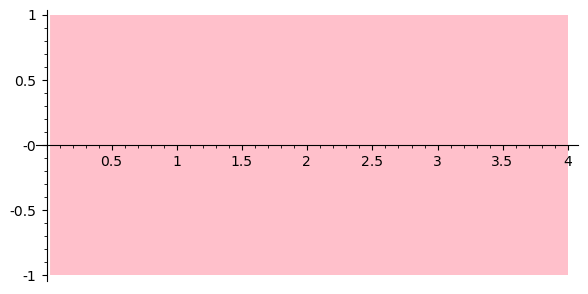

In [53]:
test_monitoring(prop, 4, symbolic_composition=True)[1].plot()

Precomposed systems in 4.315376281738281e-05 sec
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.27999999999999997 .. 0.32000000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.27999999999999997..0.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Computed 2334 flowpipes in 164.48424553871155 sec
PolyObserver(-x6 + 0.8000000000000

/usr/lib64/python3.7/site-packages/sage/plot/contour_plot.py:205: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths, linestyles=linestyles)


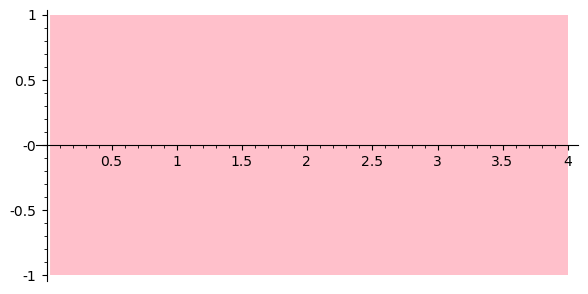

In [54]:
test_monitoring(prop, 4, symbolic_composition=True, masks=True)[1].plot()

Precomposed systems in 4.291534423828125e-05 sec
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.27999999999999997 .. 0.32000000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.27999999999999997..0.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Computed 2334 flowpipes in 164.05490970611572 sec
PolyObserver(-x6 + 0.8000000000000

/usr/lib64/python3.7/site-packages/sage/plot/contour_plot.py:205: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths, linestyles=linestyles)


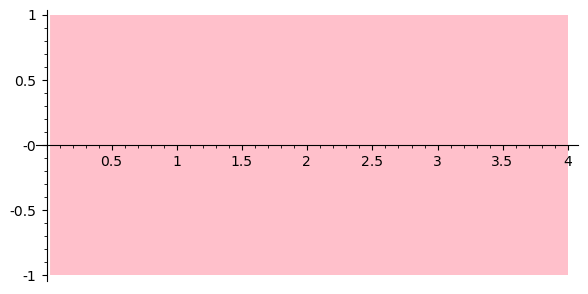

In [56]:
test_monitoring(prop, 4, symbolic_composition=True, masks=True, tentative_unpreconditioning=False)[1].plot()

Precomposed systems in 4.1961669921875e-05 sec
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.27999999999999997 .. 0.32000000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.27999999999999997..0.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Computed 2334 flowpipes in 153.6974401473999 sec
PolyObserver(-x6 + 0.8000000000000000

/usr/lib64/python3.7/site-packages/sage/plot/contour_plot.py:205: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths, linestyles=linestyles)


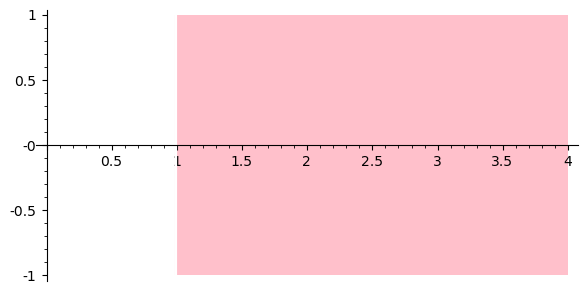

In [57]:
test_monitoring(prop, 4, global_root_detection=True)[1].plot()

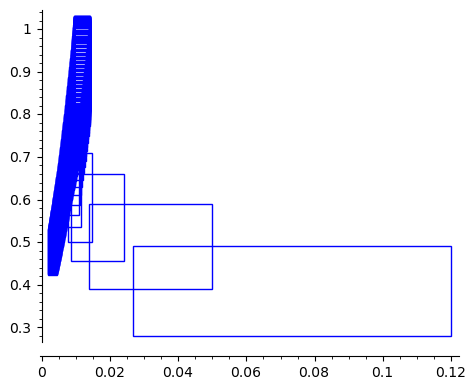

In [58]:
out

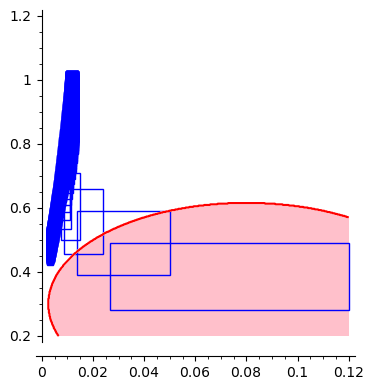

In [75]:
def f(x4, x6):
    return (  (1/(0.006))*(x4 - 0.08)**2
            + (1/(0.1))*(x6 - 0.3)**2
            <= 1  )
out1 = out + region_plot(f, (x4, 0, 0.12), (x6, 0.2, 1.2), incol='pink', plot_points=500, bordercol='red')
out1.set_aspect_ratio(1/8)
out1

In [78]:
prop = Atomic((1/RIF("0.006"))*(var("x4") - RIF("0.08"))**2
            + (1/RIF("0.1"))*(var("x6") - RIF("0.3"))**2
            <= 1)
prop

Atomic(166.6666666666667?*(x4 - 0.0800000000000000?)^2 + 10.00000000000000?*(x6 - 0.3000000000000000?)^2 <= 1)

Precomposed systems in 7.3909759521484375e-06 sec
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.27999999999999997 .. 0.32000000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.27999999999999997..0.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Computed 2334 flowpipes in 192.93916630744934 sec
PolyObserver(-166.6666666666667?*

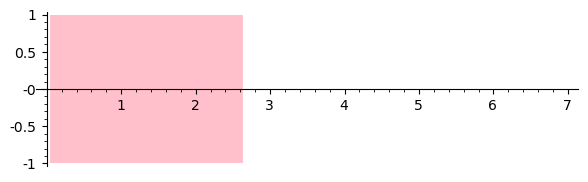

In [81]:
test_monitoring(prop, 7)[1].plot()

Precomposed systems in 5.245208740234375e-06 sec
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.27999999999999997 .. 0.32000000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.27999999999999997..0.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Computed 2334 flowpipes in 168.86406350135803 sec
PolyObserver(-166.6666666666667?*x

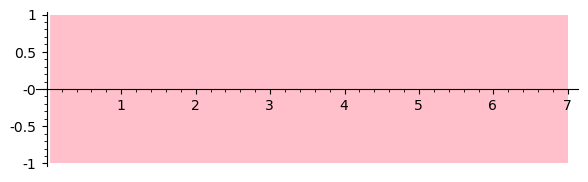

In [83]:
test_monitoring(prop, 7, symbolic_composition=True)[1].plot()